In [62]:
from cpclasses import *
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.utils import to_dense_adj
from torch_geometric.nn import MessagePassing
from torch_geometric.nn.aggr import SumAggregation


from importlib import reload

import GraphNeuralNetworks
reload(GraphNeuralNetworks)
from GraphNeuralNetworks import *

In [63]:
torch.manual_seed(0)
elements_for_random_graph(4)

(tensor([[4.9626, 7.6822],
         [3.0742, 6.3408],
         [3.4889, 4.0172],
         [6.9767, 8.0001]]),
 tensor([[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
         [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]]),
 tensor([0., 1., 2., 3.]))

In [64]:
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)
edge_index = np.array([[0, 1],
                       [1, 0],
                       [1, 2],
                       [2, 1]])
edge_index = torch.tensor(edge_index.T, dtype=torch.long)

graph = Data(x=x, edge_index=edge_index)
graph

Data(x=[3, 1], edge_index=[2, 4])

In [65]:
positions, edge_index, x= elements_for_random_graph(4)

graph = Data(pos=positions, edge_index=edge_index, x=x)


for key, item in graph:
    print(f'{key}: {item}')



x: tensor([0., 1., 2., 3.])
edge_index: tensor([[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
        [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]])
pos: tensor([[1.6103, 2.8227],
        [2.7825, 4.8196],
        [0.0513, 1.7565],
        [0.2370, 4.9101]])


In [66]:
print(graph.pos)



tensor([[1.6103, 2.8227],
        [2.7825, 4.8196],
        [0.0513, 1.7565],
        [0.2370, 4.9101]])


tensor([[1.2347, 1.1432],
        [3.2508, 0.9019],
        [3.9429, 2.9726],
        [4.2176, 5.0647]])
tensor([[2.7286, 6.8835],
        [0.8796, 7.7092],
        [1.4731, 5.2230],
        [3.2027, 9.2174]])


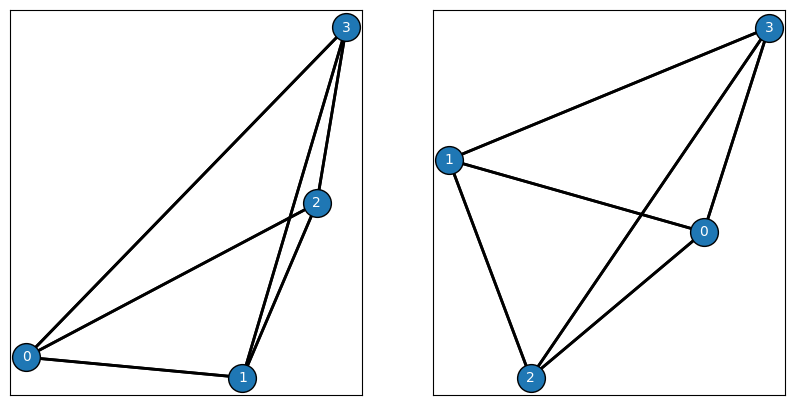

In [67]:
fig, axs  = plt.subplots(1, 2, figsize=(10, 5))
pos, edge_index, x = elements_for_random_graph(4)
graph1 = Data(pos=pos, edge_index=edge_index, x=x)
pos, edge_index, x = elements_for_random_graph(4)
graph2 = Data(pos=pos, edge_index=edge_index, x=x)
for ax, graph in zip(axs, [graph1, graph2]):
    draw_graph(graph, ax)
    ax.set(xticks=[], yticks=[]) 


In [68]:
#save_plot(fig, 'random_graph.png')

In [70]:

graph = Data(pos=positions, edge_index=edge_index, x=x)
adj_matrix = to_dense_adj(graph.edge_index)
adj_matrix

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [71]:
check_identical(graph1, graph2)

True

In [ ]:
#Keep short edges removes edges that are too far apart.

print(graph1.edge_index)

keep_short_edges(graph1.edge_index, graph1.x)

tensor([[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
        [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]])


tensor([[0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3],
        [0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 1, 2, 3]])

tensor([[5.9819, 1.2876],
        [6.7365, 3.1756],
        [7.0675, 5.3919],
        [7.4158, 7.7257]])
tensor([[1.8661, 6.4345],
        [4.1003, 6.9466],
        [1.5878, 4.1921],
        [1.7528, 8.4720]])


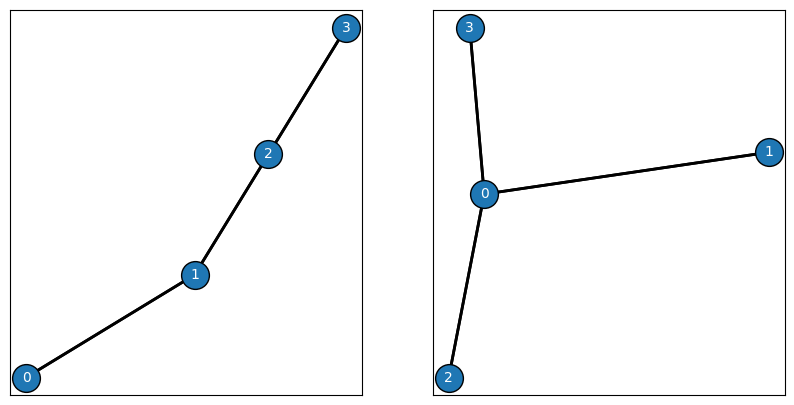

In [78]:
graph3=  random_graph(4)
graph4 = random_graph(4)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for ax, graph in zip(axs, [graph3, graph4]):

    draw_graph(graph, ax)
    ax.set(xticks=[], yticks=[])    


In [79]:
#save_plot(fig, 'random_graph, shortened.png')

In [80]:
check_identical(graph3, graph4)

False

In [81]:
N = 1000
unique_graphs = [random_graph(5)]

for i in range(N):
    graph = random_graph(5)
    identical = False
    for unique_graph in unique_graphs:
        if check_identical(graph, unique_graph):
            identical = True
    
    #print(i, identical)
    if not identical:
        #print('Adding graph')
        unique_graphs.append(graph)
    
    


        
print(len(unique_graphs))

13


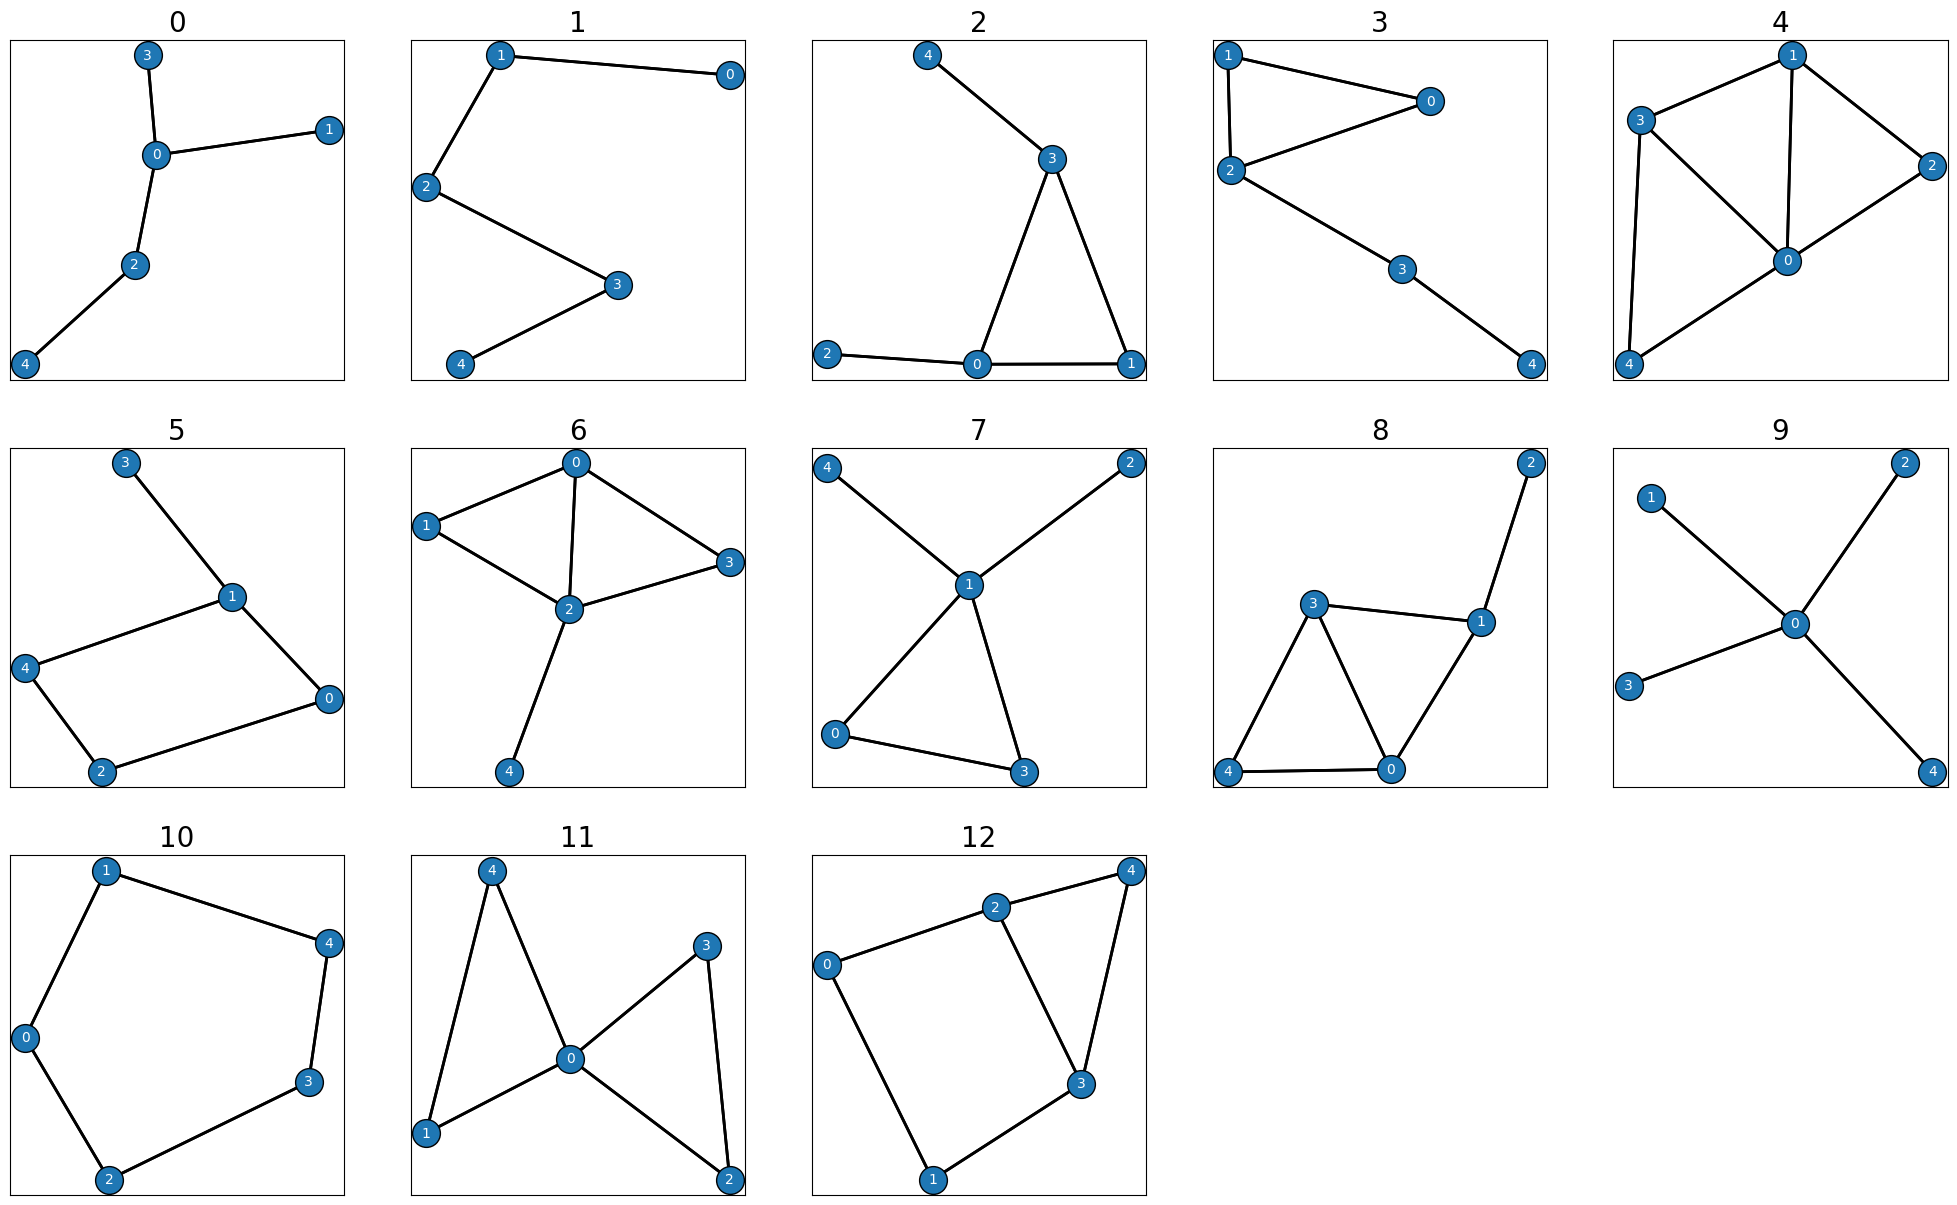

In [ ]:
cols = 5
rows = int(np.ceil(len(unique_graphs) / cols))

fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))


for ax, graph, i in zip(axs.flat, unique_graphs + [0, 0], range(len(unique_graphs) + 2)):
    ax.set(xticks=[], yticks=[])
    if graph == 0:
        ax.axis('off')
        continue
    ax.set_title(f'{i}', fontsize=20)
    draw_graph(graph, ax)
    


In [ ]:
#save_plot(fig, 'unique_graphs.png')

tensor([[8.9419, 8.6899],
        [7.1255, 9.4971],
        [7.1526, 7.4723],
        [8.6909, 5.7265],
        [9.8494, 4.0503]])
tensor([[4.7895, 1.3665],
        [4.8637, 3.2668],
        [6.7749, 2.2462],
        [2.7869, 2.6647],
        [2.6243, 0.4087]])
tensor([[[1., 1., 1., 0., 0.],
         [1., 1., 1., 0., 0.],
         [1., 1., 1., 1., 0.],
         [0., 0., 1., 1., 1.],
         [0., 0., 0., 1., 1.]]])
tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 0.],
         [1., 1., 1., 0., 0.],
         [1., 1., 0., 1., 1.],
         [1., 0., 0., 1., 1.]]])
False


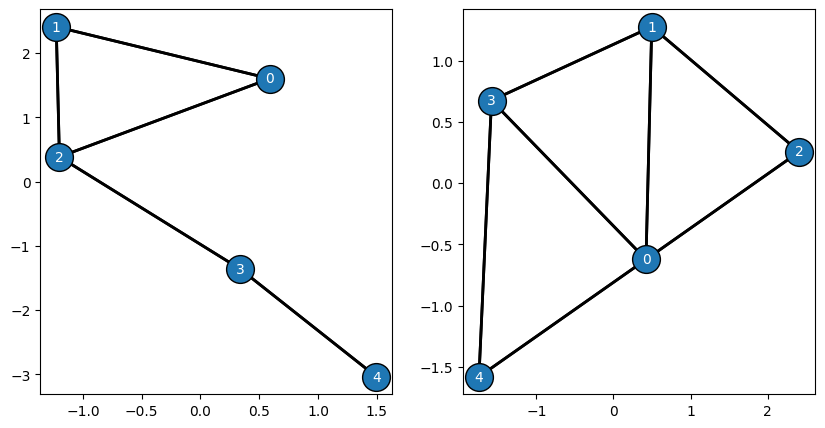

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

draw_graph(unique_graphs[3], ax[0])
draw_graph(unique_graphs[4], ax[1])

print(to_dense_adj(unique_graphs[3].edge_index))
print(to_dense_adj(unique_graphs[4].edge_index))

print(check_identical(unique_graphs[3], unique_graphs[4]))

In [83]:

adj_matrix1 = to_dense_adj(unique_graphs[3].edge_index)
adj_matrix2 = to_dense_adj(unique_graphs[4].edge_index)
print(adj_matrix1)
print(adj_matrix2)


eigenvalues1 = sorted(np.linalg.eigvals(adj_matrix1)[0])
eigenvalues2 = sorted(np.linalg.eigvals(adj_matrix2)[0])
print(eigenvalues1)
print(eigenvalues2)

print(np.allclose(eigenvalues1, eigenvalues2))


tensor([[[1., 1., 1., 0., 0.],
         [1., 1., 1., 0., 0.],
         [1., 1., 1., 1., 0.],
         [0., 0., 1., 1., 1.],
         [0., 0., 0., 1., 1.]]])
tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 0.],
         [1., 1., 1., 0., 0.],
         [1., 1., 0., 1., 1.],
         [1., 0., 0., 1., 1.]]])
[-0.67513084, -7.5407836e-17, 0.46081114, 2.0, 3.2143197]
[-0.618034, -0.4728339, 0.53740156, 1.618034, 3.9354324]
False
